In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

import tensorflow as tf

In [4]:
df= pd.read_csv(r"C:\Users\Shirfil Mohammed\Desktop\loan_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.shape

(9578, 14)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


# Missing values check

In [10]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Values checking

In [11]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())

credit.policy
1    7710
0    1868
Name: credit.policy, dtype: int64
purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
int.rate
0.1253    354
0.0894    299
0.1183    243
0.1218    215
0.0963    210
         ... 
0.2016      1
0.1683      1
0.1778      1
0.1756      1
0.1867      1
Name: int.rate, Length: 249, dtype: int64
installment
317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: installment, Length: 4788, dtype: int64
log.annual.inc
11.002100    308
10.819778    248
10.308953    224
10.596635    224
10.714418    221
            ... 
11.217534      1
12.078239      1
10.068451      1
9.621788       1
10.110472      1
Name: log.annual.inc, Length: 1987, dtype: int64
dti
0.00     89
10.00    19
0.60     16
15.10    1

# Convert categorical values into numerical values

In [12]:
data=pd.get_dummies(df,columns=['purpose'])

In [13]:
data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


# Data Visualisation

<AxesSubplot:>

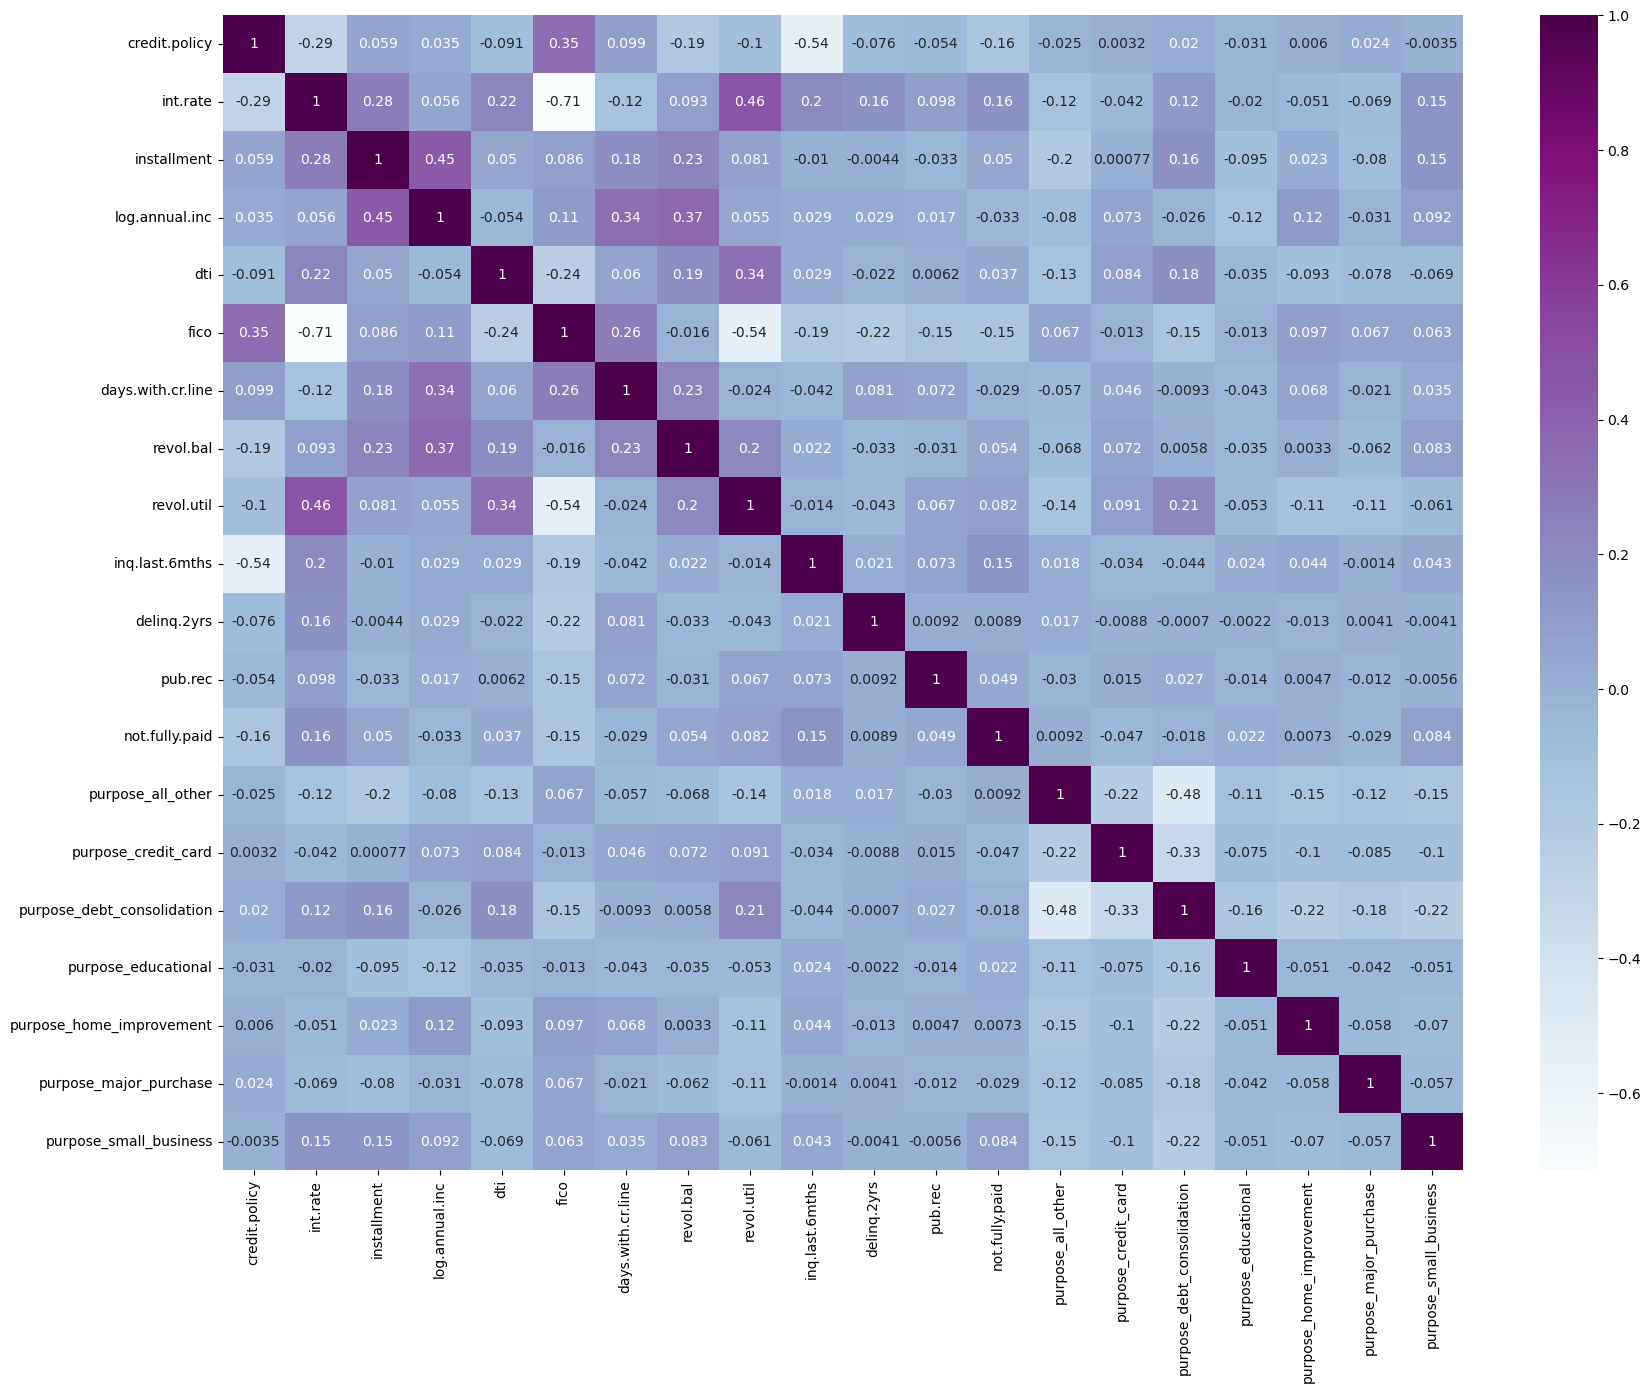

In [14]:
#finding correlation between variables/ data columns
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True,cmap="BuPu")

- We have no pairs with correlation values greater than 0.75. So it is better to keep all columns. 

# Checking data imbalance

<AxesSubplot:>

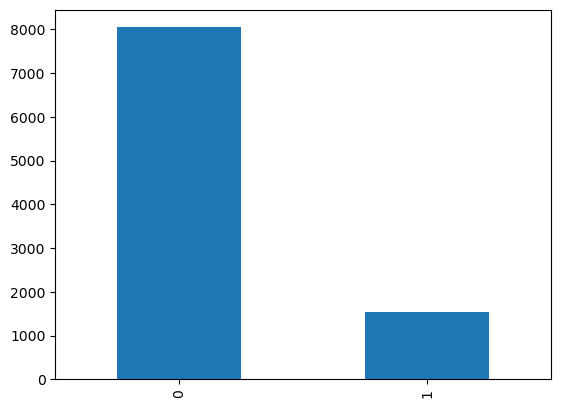

In [15]:
data['not.fully.paid'].value_counts().plot(kind='bar')

-Since there is imbalance in dataset, while training the data will cause issue. So proper measures to be taken before training.






# Checking for Outliers

Boxplot of different data columns : 




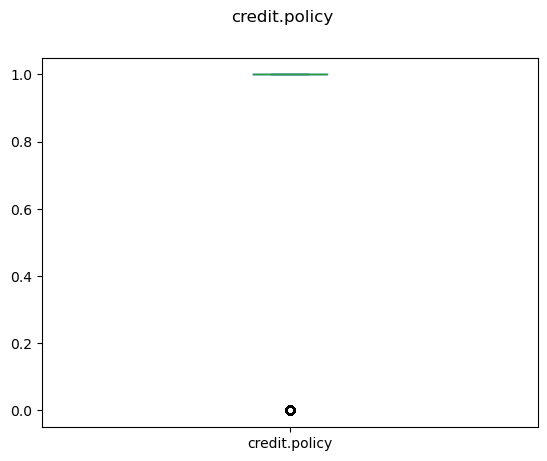

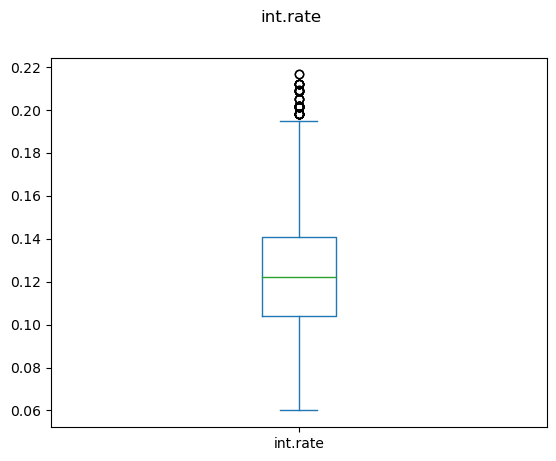

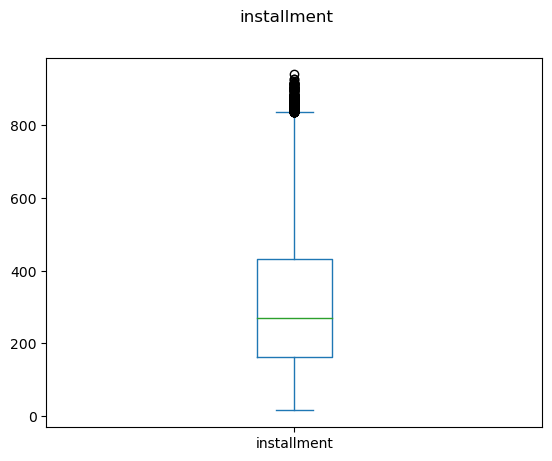

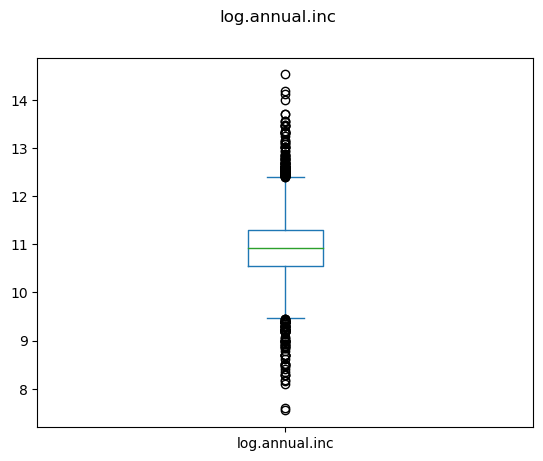

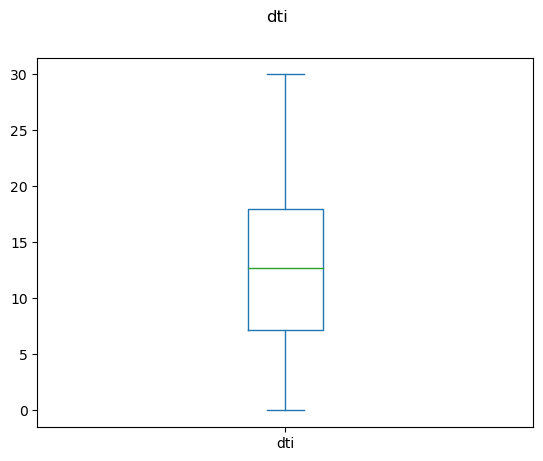

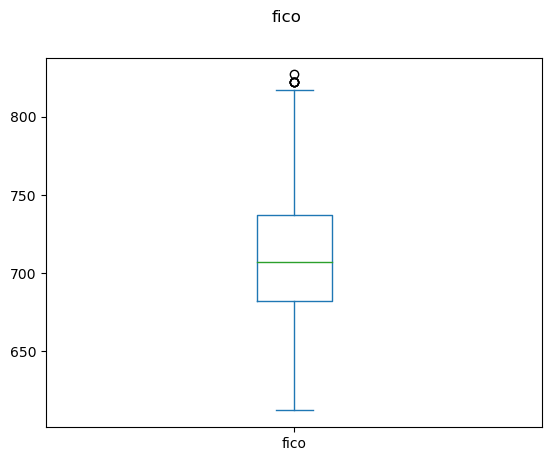

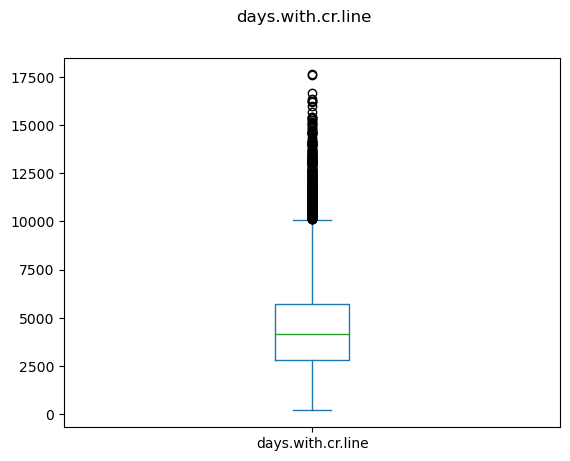

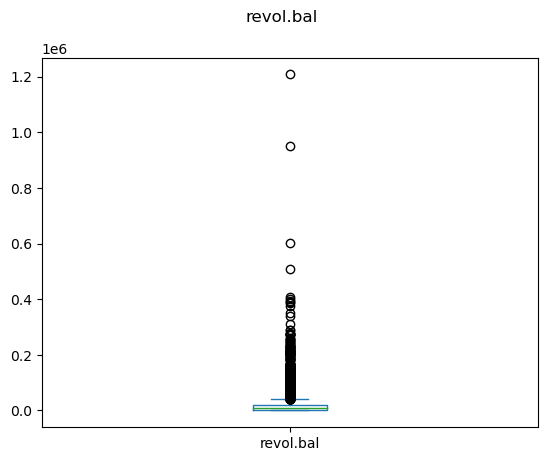

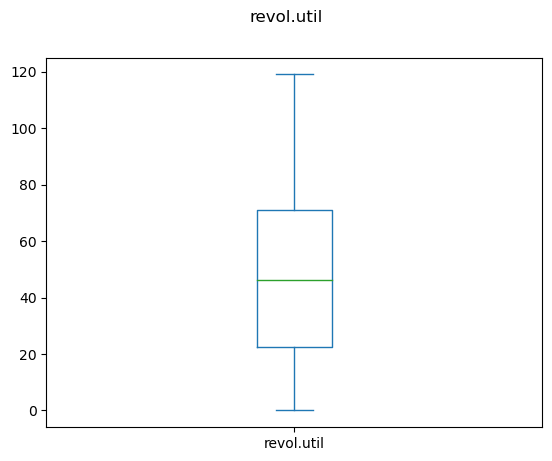

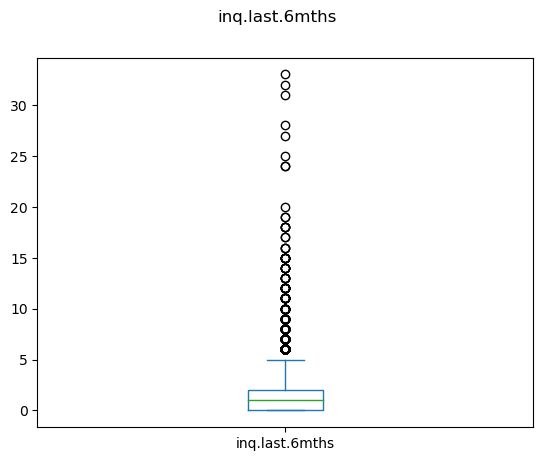

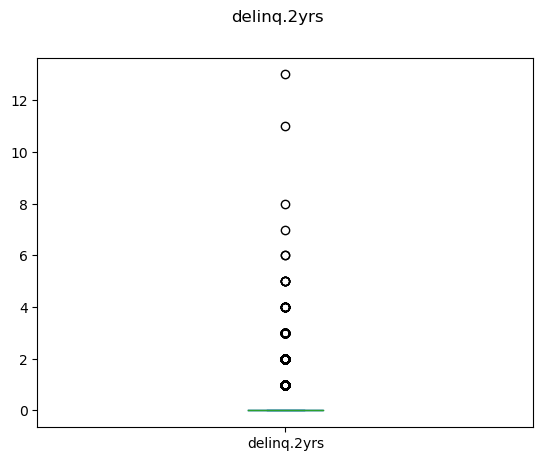

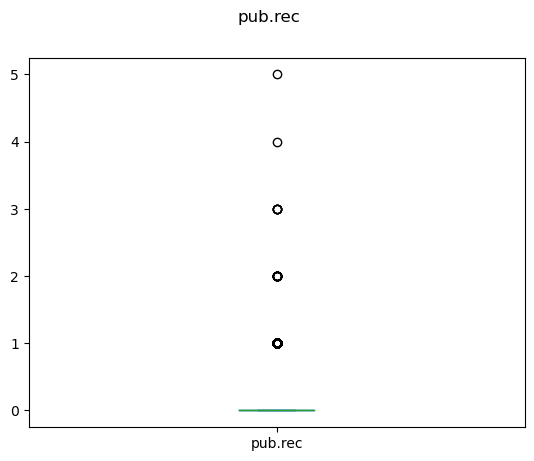

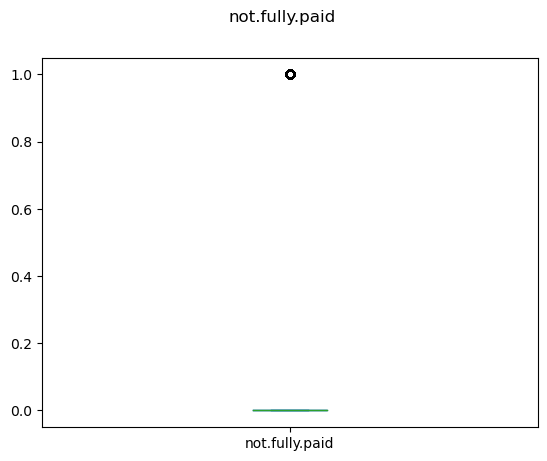

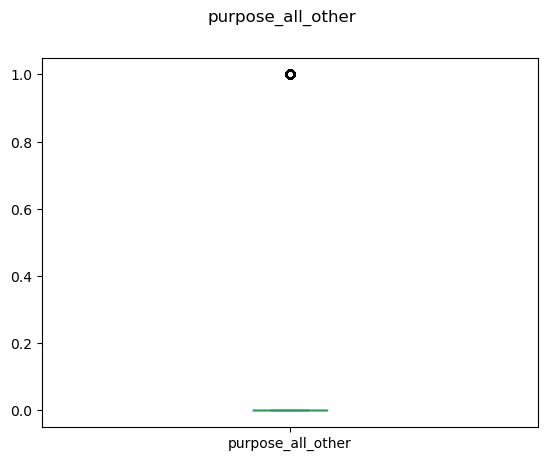

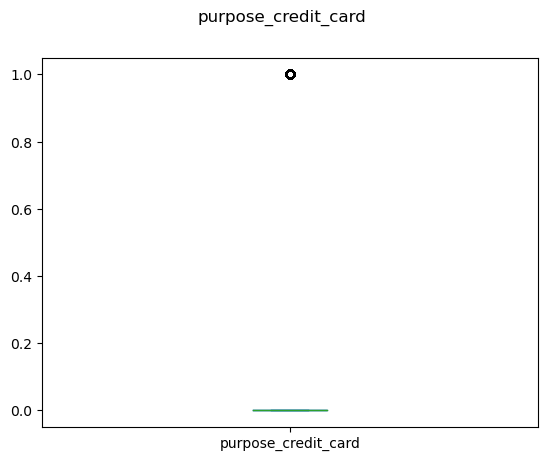

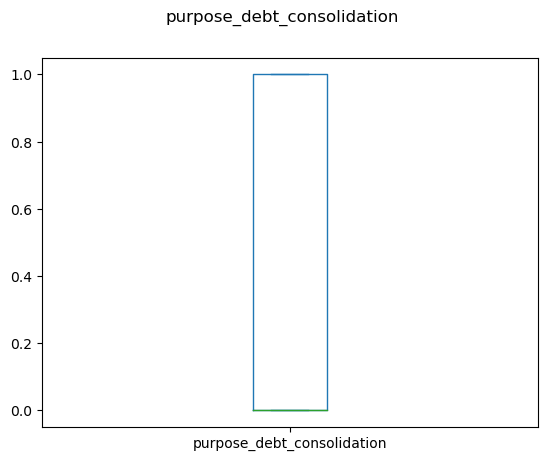

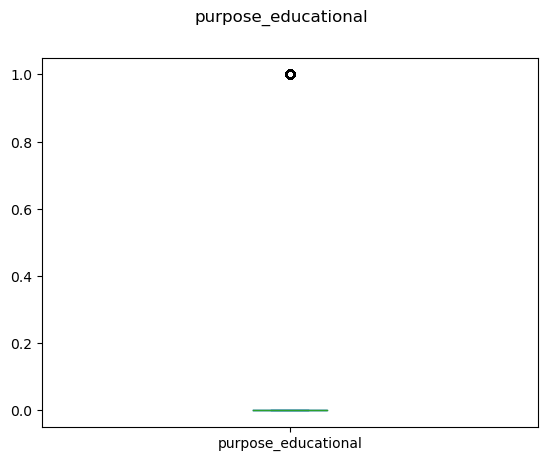

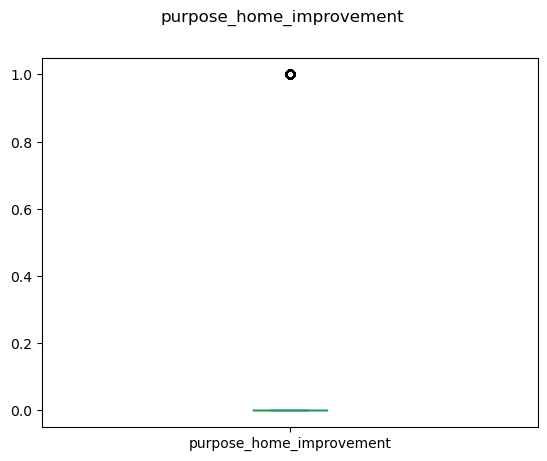

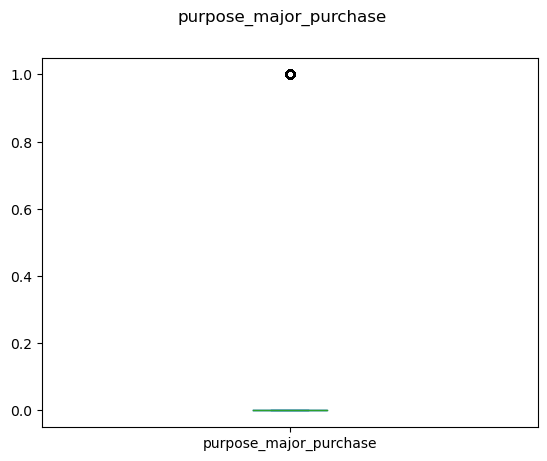

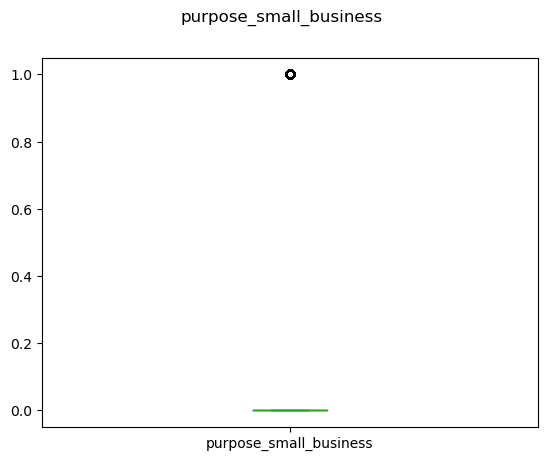

In [16]:
print("Boxplot of different data columns : \n\n")
for col in data.columns:
    fig,axes= plt.subplots(1,1)
    data[col].plot(kind='box', ax=axes, subplots =True, title=col)

# Removing outliers

In [17]:
#removing for 'fico'

data.drop(np.where(data['fico']>820)[0],inplace=True)
print("New dataset shape :  ",data.shape )

New dataset shape :   (9572, 20)


In [18]:
data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [19]:
#removing for 'log.annual.inc'

Q1= np.percentile (data['log.annual.inc'], 25, interpolation = 'midpoint')
Q3 = np.percentile (data['log.annual.inc'], 75, interpolation = 'midpoint')
IQR = Q3-Q1
print("Old Shape before outlier removal in log.annual.inc: ", data.shape) 
upper = np.where(data['log.annual.inc'] >= (Q3+1.5*IQR))
lower = np.where(data['log.annual.inc'] <= (Q1-1.5*IQR))

data.drop(upper[0], inplace=True) 
data.drop(lower [0], inplace = True)
print("New Shape after outlier removal of log.annual.inc ", data.shape)

Old Shape before outlier removal in log.annual.inc:  (9572, 20)
New Shape after outlier removal of log.annual.inc  (9334, 20)


# Understanding distribution for 'Fico'

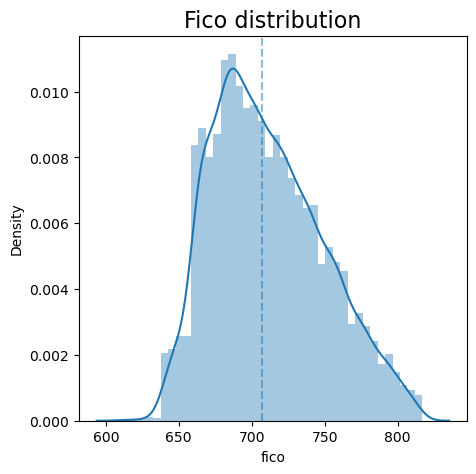

In [20]:
fig, (ax1)= plt.subplots(1, 1, figsize=(5,5)) 
sns.distplot(data["fico"], ax=ax1) 
ax1.set_title("Fico distribution", fontsize=16); 
ax1.axvline(x=data["fico"].median(), linestyle="--", alpha=0.5)

- Distribution of Fico is left skewed.



# Histogram of two FICO distributions for Loan fully Paid 

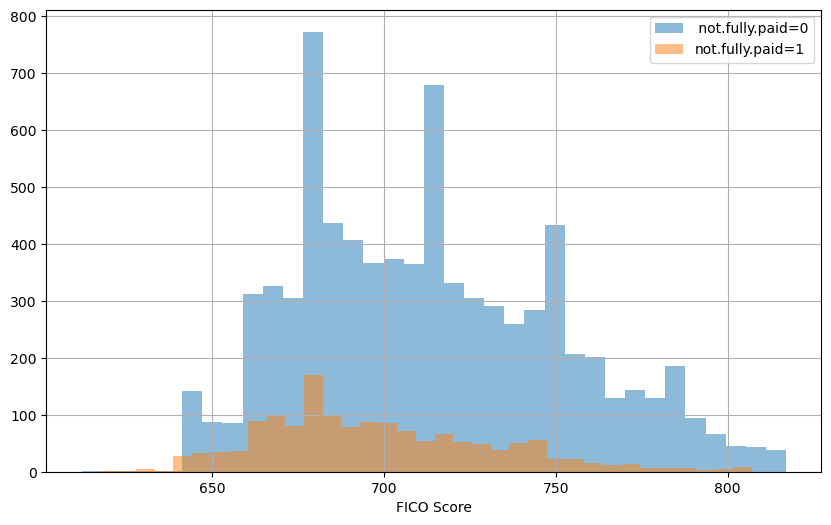

In [21]:
plt.figure(figsize=(10,6))
data[data['not.fully.paid']==0]['fico'].hist (bins=35, alpha=0.5, label=' not.fully.paid=0') 
data[data['not.fully.paid']==1]['fico'].hist (bins=35, alpha=0.5, label='not.fully.paid=1') 
plt.xlabel('FICO Score') 
plt.legend()

## Histogram of two FICO distributions on top of each other, one for each credit.policy

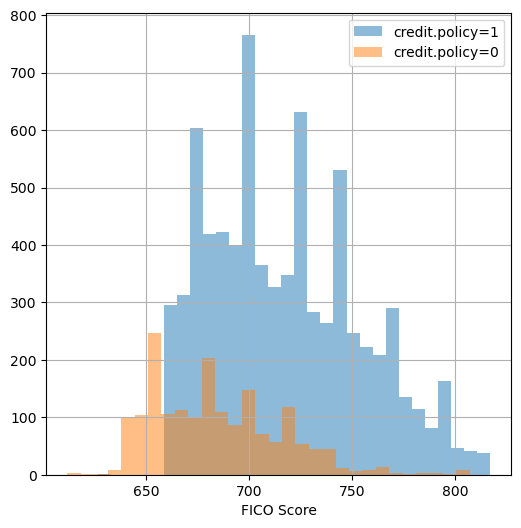

In [22]:
plt.figure(figsize=(6,6))
data[data['credit.policy']==1]['fico'].hist (bins=30, alpha=0.5, label='credit.policy=1') 
data[data['credit.policy'] ==0]['fico'].hist (bins=30, alpha=0.5, label='credit.policy=0')
plt.xlabel('FICO Score')
plt.legend()

• From figure its understood that People with high FICO scores tend to meet the credit underwriting criteria.


## Analysis of Loan Fully paid or not versus Credit policy

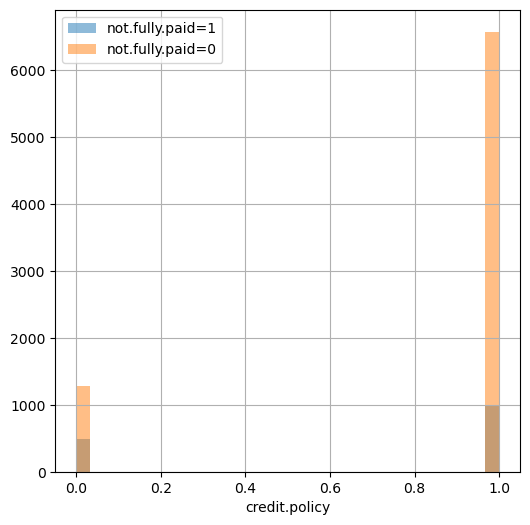

In [23]:
plt.figure(figsize=(6,6))
data [data['not.fully.paid'] ==1]['credit.policy'].hist (bins=30, alpha=0.5, label='not.fully.paid=1') 
data [data['not.fully.paid'] ==0]['credit.policy'].hist (bins=30, alpha=0.5, label='not.fully.paid=0') 
plt.xlabel('credit.policy') 
plt.legend()

In [24]:
data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


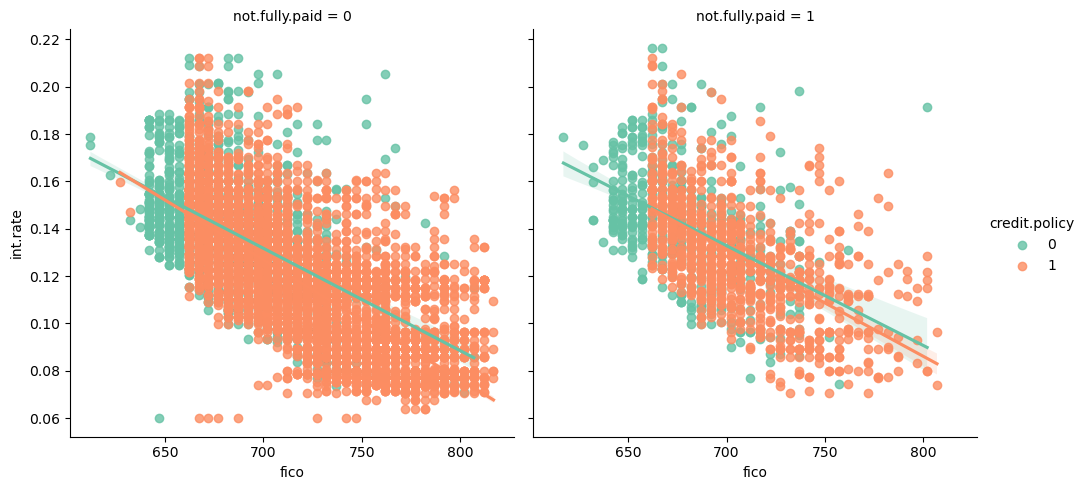

In [25]:
sns.lmplot(x='fico', y='int.rate', data=data, col= 'not.fully.paid', hue='credit.policy', palette='Set2')

# Create training and test dataset

In [26]:
#Seperate feature variables and target variable
x_data=data.drop('not.fully.paid', axis=1) 
y_data=data['not.fully.paid']

In [27]:
#train-test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x_data,y_data, test_size=0.25, random_state=42)

# SMOTE(Synthetic Minority Over Sampling Technique)

To perform oversampling to resolve the issue of DATA IMBALANCE.

In [28]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority', random_state=42) 
X_sm,y_sm = smote.fit_resample (x_train, y_train)

In [29]:
y_sm.value_counts()

1    5871
0    5871
Name: not.fully.paid, dtype: int64

In [31]:
X_sm.shape

(11742, 19)

In [50]:
X_sm

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.090100,795.110000,13.331002,3.830000,782,3660.000000,148829,6.600000,5,0,0,0,0,0,0,0,0,1
1,0,0.130400,674.270000,11.849398,4.890000,697,6149.958333,26761,47.100000,4,0,0,0,0,0,0,0,0,1
2,1,0.134700,678.460000,10.839581,17.460000,697,2850.000000,8467,26.700000,1,0,0,1,0,0,0,0,0,0
3,1,0.076800,86.560000,9.823362,4.550000,762,4590.000000,1223,6.600000,1,0,0,0,0,1,0,0,0,0
4,1,0.085900,189.670000,10.896739,11.980000,742,3929.958333,10275,43.900000,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11737,1,0.094900,381.808188,11.062978,16.457995,732,4936.663078,14250,38.154732,0,0,0,0,0,0,0,0,0,0
11738,0,0.116362,160.858718,10.491256,2.340546,676,599.961622,353,31.342203,2,0,0,0,0,0,0,0,0,0
11739,1,0.132957,299.821952,10.136023,10.148873,692,2225.193116,0,21.406394,2,0,0,0,0,1,0,0,0,0
11740,1,0.120072,419.231420,10.612138,9.006854,718,3322.702755,11526,25.141465,0,0,0,0,0,1,0,0,0,0


In [32]:
y_sm.shape

(11742,)

# Build the Model

Steps for buliding Deep Learning Model

1.Define the model

2.Compiling the model

3.Fitting the model

4.Evaluating the model

5.Make Predictions

In [33]:
# import necessary Libraries from tensorflow, keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Reshape

In [51]:
#Define the model
model =Sequential()
#Add initial layer
model.add(Reshape ((19,), input_shape=(19,))) 
model.add(BatchNormalization()) 

In [52]:
#Add 1st hidden Layer
model.add(Dense(3000, activation="relu")) 
model.add(BatchNormalization())
#Add 2nd hidden Layer
model.add(Dense (1200, activation="relu")) 
model.add(BatchNormalization())
model.add(Dropout (0.2)) # Add droupout
#Add 3rd hidden Layer
model.add(Dense (600, activation="relu")) 
model.add(BatchNormalization())
model.add(Dropout (0.3))
# Add output Layer
model.add(Dense (100, activation="relu"))
model.add(BatchNormalization())
# Add output Layer
model.add(Dense (1, activation='sigmoid'))

In [53]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 19)                0         
                                                                 
 batch_normalization_5 (Batc  (None, 19)               76        
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 3000)              60000     
                                                                 
 batch_normalization_6 (Batc  (None, 3000)             12000     
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 1200)              3601200   
                                                                 
 batch_normalization_7 (Batc  (None, 1200)            

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [67]:
# Fit the model
h1=model.fit(X_sm,y_sm,
              validation_data=(x_test,y_test), 
              epochs=12,batch_size=32)

Epoch 1/12
367/367 [==============================] - 18s 48ms/step - loss: 0.3585 - accuracy: 0.8289 - val_loss: 0.4622 - val_accuracy: 0.8068
Epoch 2/12
367/367 [==============================] - 19s 52ms/step - loss: 0.3523 - accuracy: 0.8278 - val_loss: 0.4970 - val_accuracy: 0.7845
Epoch 3/12
367/367 [==============================] - 17s 48ms/step - loss: 0.3500 - accuracy: 0.8333 - val_loss: 0.4942 - val_accuracy: 0.7789
Epoch 4/12
367/367 [==============================] - 17s 47ms/step - loss: 0.3464 - accuracy: 0.8359 - val_loss: 0.5176 - val_accuracy: 0.7511
Epoch 5/12
367/367 [==============================] - 18s 49ms/step - loss: 0.3457 - accuracy: 0.8378 - val_loss: 0.5196 - val_accuracy: 0.7738
Epoch 6/12
367/367 [==============================] - 21s 56ms/step - loss: 0.3422 - accuracy: 0.8367 - val_loss: 0.5079 - val_accuracy: 0.7734
Epoch 7/12
367/367 [==============================] - 19s 52ms/step - loss: 0.3369 - accuracy: 0.8427 - val_loss: 0.4904 - val_accuracy:

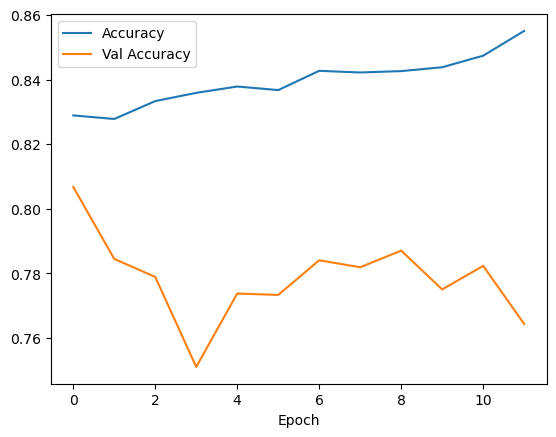

In [68]:
#Plot the Accuracy values
plt.plot(h1.history["accuracy"],label = 'Accuracy') 
plt.plot(h1.history["val_accuracy"], label='Val Accuracy')
plt.xlabel('Epoch')
plt.legend() 
plt.show()

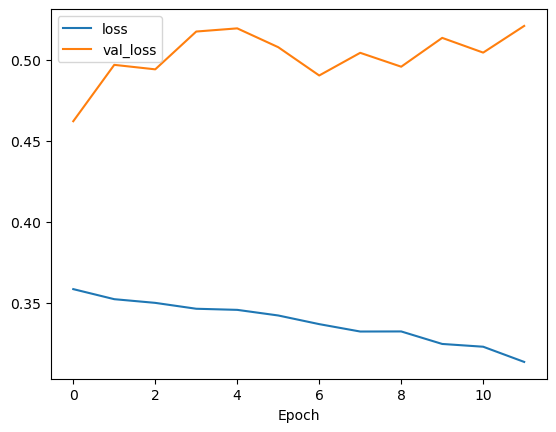

In [70]:
#Plot the Loss values
plt.plot(h1.history["loss"], label = 'loss')
plt.plot(h1.history["val_loss"],label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [71]:
ypred= model.predict(x_test)
ypred

73/73 [==============================] - 1s 5ms/step


array([[0.22148429],
       [0.00600358],
       [0.01835611],
       ...,
       [0.762215  ],
       [0.04431391],
       [0.10283589]], dtype=float32)